<a href="https://colab.research.google.com/github/pradyotqc/Atoms_molecules01/blob/main/QSCI_Atoms_test_Li_gs_17_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install -q qiskit
! pip install -q qiskit-aer
! pip install -q qiskit-algorithms
! pip install -q qiskit-nature
! pip install -q qiskit-nature-pyscf # install the pyscf library
! pip install -q qiskit-ibm-runtime
# print(qiskit.__version__)
# print(qiskit_aer.__version__)
# print(qiskit_algorithms.__version__)
# print(qiskit_nature.__version__)
# print(qiskit_nature_pyscf.__version__)
# print(qiskit_ibm_runtime.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.

In [6]:
import qiskit_nature
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_ibm_runtime
import qiskit_nature_pyscf
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit.circuit.library import EfficientSU2
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_aer import  AerSimulator
# from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_algorithms.optimizers import SLSQP
from qiskit_aer.primitives import Estimator
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.problems import ElectronicBasis
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import ParityMapper
from scipy.linalg import eigh
from qiskit_nature.second_q.circuit.library import HartreeFock
from scipy.linalg import expm
from qiskit.quantum_info import Statevector
from numpy import pi

# Analysis of Li atom in 10 spin orbitals:

In [7]:
mdriver = PySCFDriver(
    atom="Li 0.0 0.0 0.0",  # Specify the atom and its coordinates
    basis="sto3g",          # Define the basis set
    charge=0,                # Set the charge of the atom
    spin=1,                 # Set the spin of the atom
    unit=DistanceUnit.ANGSTROM, # Define the unit of the coordinates
)

# You can now use the driver to run a calculation
electronic_structure_problem = mdriver.run()

In [8]:
print("Spatial orbitals:", electronic_structure_problem.num_spatial_orbitals)
print("Number of up spin: ", electronic_structure_problem.num_alpha)
print("Number of down spin: ", electronic_structure_problem.num_beta)
print("\n")
print("Down spin configuration : ", electronic_structure_problem.orbital_occupations_b)
print("Down spin configuration : ",electronic_structure_problem.orbital_occupations)
print("Number of particles: ", electronic_structure_problem.num_particles)
# print(electronic_structure_problem.second_q_ops()[0])

Spatial orbitals: 5
Number of up spin:  2
Number of down spin:  1


Down spin configuration :  [1. 0. 0. 0. 0.]
Down spin configuration :  [1. 1. 0. 0. 0.]
Number of particles:  (2, 1)


In [9]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper

solver = GroundStateEigensolver(
    JordanWignerMapper(),
    NumPyMinimumEigensolver(),
)

result = solver.solve(electronic_structure_problem)
print(result)
print("HF energy : ", electronic_structure_problem.reference_energy)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -7.315836552851
  - computed part:      -7.315836552851
~ Nuclear repulsion energy (Hartree): 0.0
> Total ground state energy (Hartree): -7.315836552851
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 3.000 S: 0.500 S^2: 0.750 M: -0.103
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.0]
    - computed part:      [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 
HF energy :  -7.315525981281089


In [10]:
mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(electronic_structure_problem.second_q_ops()[0])
state = HartreeFock(electronic_structure_problem.num_spatial_orbitals, electronic_structure_problem.num_particles, mapper)
print(state)

     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────
          
q_8: ─────
          
q_9: ─────
          


In [11]:
statevector = Statevector(state)
k = 3
E_sub = np.zeros((k, k), dtype=complex)
S_sub = np.zeros((k, k), dtype=complex)
for i in range(k):
    for j in range(k):
        U = expm(-(i-j)*pi*1j*qubit_hamiltonian/0.085354)

        # Apply the unitary operator to the statevector using evolve()
        evolved_statevector = statevector.evolve(U)

        # Now you can access the data of the evolved statevector
        S_sub[i, j] = statevector.expectation_value(U)

        # Now apply hamiltonian to evolved state
        evolved_statevector = evolved_statevector.evolve(qubit_hamiltonian)
        E_sub[i, j] = statevector.inner(evolved_statevector)

print(E_sub)
print(S_sub)


[[-7.31552598+0.j         -4.51441473-5.7554438j   1.74363933-7.10398221j]
 [-4.51441473+5.7554438j  -7.31552598+0.j         -4.51441473-5.7554438j ]
 [ 1.74363933+7.10398221j -4.51441473+5.7554438j  -7.31552598+0.j        ]]
[[ 1.        +0.j          0.61708769+0.78668764j -0.23836513+0.97103201j]
 [ 0.61708769-0.78668764j  1.        +0.j          0.61708769+0.78668764j]
 [-0.23836513-0.97103201j  0.61708769-0.78668764j  1.        +0.j        ]]


In [12]:
def regularize_matrix(matrix, epsilon=1e-10):
    matrix += epsilon * np.eye(matrix.shape[0])
    return matrix
S_sub = regularize_matrix(S_sub)

eigenvalues, eigenvectors = eigh(E_sub, S_sub)
print(eigenvalues)
print(eigenvectors)
# print(eigenvalues[0]- eigenvalues[1])

[-7.31576947 -4.99352327 -4.32763749]
[[-3.45115401e-01+5.32114370e-02j -2.61981857e+01+1.04405128e+01j
  -1.66477647e+02-6.57006918e+01j]
 [-1.91198791e-01+2.43786935e-01j -1.31646761e+01-4.57503650e+01j
   1.34996217e+02+8.74647831e+01j]
 [ 3.05658664e-02+3.47853165e-01j  2.77405668e+01-5.08037331e+00j
  -1.27997931e+02-1.25091636e+02j]]


In [13]:
exact_eva, exact_eve = eigh(qubit_hamiltonian.to_matrix())
print(exact_eva)

[-7.31583655e+00 -7.31583655e+00 -7.25379126e+00 ... -4.90501018e-01
  1.64868119e-14  3.77428002e-01]


In [14]:
eigenvalues

array([-7.31576947, -4.99352327, -4.32763749])

In [15]:
from scipy.linalg import norm
# Here 10 is the number of spin orbitals to used in our calculation

psi_i = Statevector([0] *(2**10))
# print(norm(eigenvectors[0]))
for i in range(k):
    evolved_statevector = statevector.evolve(U)
    psi_i += eigenvectors[0][i] / norm(eigenvectors[0]) * evolved_statevector
print("Unnormalised state:", psi_i.data)
print("Norm of state:", abs(psi_i.inner(psi_i.conjugate())))
print("Ground state energy calculate from state:", psi_i.expectation_value(qubit_hamiltonian)/abs(psi_i.inner(psi_i.conjugate())))

Unnormalised state: [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
Norm of state: 1.2278023809539398
Ground state energy calculate from state: (-7.31552598128106+0j)


In [16]:
psi_norm = abs(psi_i.inner(psi_i.conjugate()))
gs = psi_i/(psi_norm)**0.5
print("Normalised ground state:",gs.data)
print("Ground state energy:",gs.expectation_value(qubit_hamiltonian))
print(abs(gs.inner(gs.conjugate())))

Normalised ground state: [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
Ground state energy: (-7.315525981281075+0j)
1.0000000000000002


In [17]:
gs_state = gs.to_dict()
gs_state

{'0000100011': (-0.9614474320289598-0.27498879148961486j)}

In [18]:
eigenvalues

array([-7.31576947, -4.99352327, -4.32763749])

In [19]:
y = gs_state["0000100011"]
y

(-0.9614474320289598-0.27498879148961486j)

In [20]:
eigenvalues

array([-7.31576947, -4.99352327, -4.32763749])

In [21]:
-7.315836552850645+7.230481653125957

-0.08535489972468824

In [22]:
print("Spatial orbitals:", electronic_structure_problem.num_spatial_orbitals)
print("Number of up spin: ", electronic_structure_problem.num_alpha)
print("Number of down spin: ", electronic_structure_problem.num_beta)
print("\n")
print("Down spin configuration : ", electronic_structure_problem.orbital_occupations_b)
print("Down spin configuration : ",electronic_structure_problem.orbital_occupations)
print("Number of particles: ", electronic_structure_problem.num_particles)

Spatial orbitals: 5
Number of up spin:  2
Number of down spin:  1


Down spin configuration :  [1. 0. 0. 0. 0.]
Down spin configuration :  [1. 1. 0. 0. 0.]
Number of particles:  (2, 1)


In [23]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate

qubit_mapper = JordanWignerMapper()
hf_state = HartreeFock(electronic_structure_problem.num_spatial_orbitals, electronic_structure_problem.num_particles, mapper)



evolution_time = 1.0 * 3.1415 /0.085 # Time parameter for the unitary evolution
time_evolution_op = PauliEvolutionGate(qubit_hamiltonian, evolution_time)

qc = QuantumCircuit(10)
qc.compose(hf_state, inplace=True)  # Prepare the HF state
qc.append(time_evolution_op, range(10))  # Apply time evolution
qc.measure_all()


In [24]:

from qiskit_aer import Aer
backend = Aer.get_backend("qasm_simulator")
from qiskit import transpile
tqc = transpile(qc, backend)


shots = 100000
result = backend.run(tqc, shots=shots).result()
counts = result.get_counts()

# Print raw counts
print("\nMeasurement Counts:")
for state, count in counts.items():
    print(f"State |{state}>: {count} occurrences")


Measurement Counts:
State |0001000011>: 1318 occurrences
State |1000010001>: 13276 occurrences
State |0100001001>: 14249 occurrences
State |1000010010>: 102 occurrences
State |0010000101>: 810 occurrences
State |0010000110>: 51147 occurrences
State |0000100011>: 5985 occurrences
State |0100001010>: 13113 occurrences


In [25]:

evolution_times = np.linspace(0.0, 100, 20)  # List of time evolution values
evolution_times = 1.0 * 3.1415 /0.085 * evolution_times # Time parameter for the unitary evolution
shots = 100000


mapper = JordanWignerMapper()
hf_state = HartreeFock(
    electronic_structure_problem.num_spatial_orbitals,
    electronic_structure_problem.num_particles,
    mapper
)

# Step 3: Backend setup
backend = Aer.get_backend("qasm_simulator")

# Step 4: Loop over different time evolutions
state_probabilities = {}

for t in evolution_times:
    # Prepare circuit
    qc = QuantumCircuit(hf_state.num_qubits)
    qc.compose(hf_state, inplace=True)  # HF reference state
    evolution_op = PauliEvolutionGate(qubit_hamiltonian, time=t)
    qc.append(evolution_op, range(hf_state.num_qubits))  # Time evolution
    qc.measure_all()

    # Transpile and simulate
    tqc = transpile(qc, backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()

    # Normalize counts to probabilities
    total_shots = sum(counts.values())
    probabilities = {state: count / total_shots for state, count in counts.items()}
    print(f"time {t} : ",probabilities)
    # Store probabilities for this time
    state_probabilities[t] = probabilities

# Step 5: Plotting results
# Extract all possible states measured
all_states = set()
for probs in state_probabilities.values():
    all_states.update(probs.keys())

# Sort states for plotting
all_states = sorted(all_states)

time 0.0 :  {'0000100011': 1.0}
time 194.5201238390093 :  {'0001000011': 0.00441, '0100001010': 0.00642, '0000100011': 0.21091, '1000010001': 0.12544, '1000010010': 0.06586, '0010000101': 0.18306, '0100001001': 0.09132, '0010000110': 0.31258}
time 389.0402476780186 :  {'1000010001': 0.00542, '0001000011': 0.00145, '0100001001': 0.04181, '1000010010': 0.01128, '0010000101': 0.0325, '0000100011': 0.00314, '0100001010': 0.31839, '0010000110': 0.58601}
time 583.560371517028 :  {'1000010001': 0.04611, '0100001001': 0.03577, '0001000011': 0.02313, '0100001010': 0.0055, '0000100011': 0.00686, '0010000101': 0.04943, '1000010010': 0.35381, '0010000110': 0.47939}
time 778.0804953560372 :  {'0001000011': 0.00062, '0100001001': 0.00109, '1000010001': 0.00121, '0010000110': 0.41505, '0010000101': 0.00103, '1000010010': 0.09611, '0000100011': 0.00086, '0100001010': 0.48403}
time 972.6006191950465 :  {'0001000011': 0.00784, '1000010001': 0.02006, '0010000110': 0.11729, '0100001001': 0.24164, '0010000

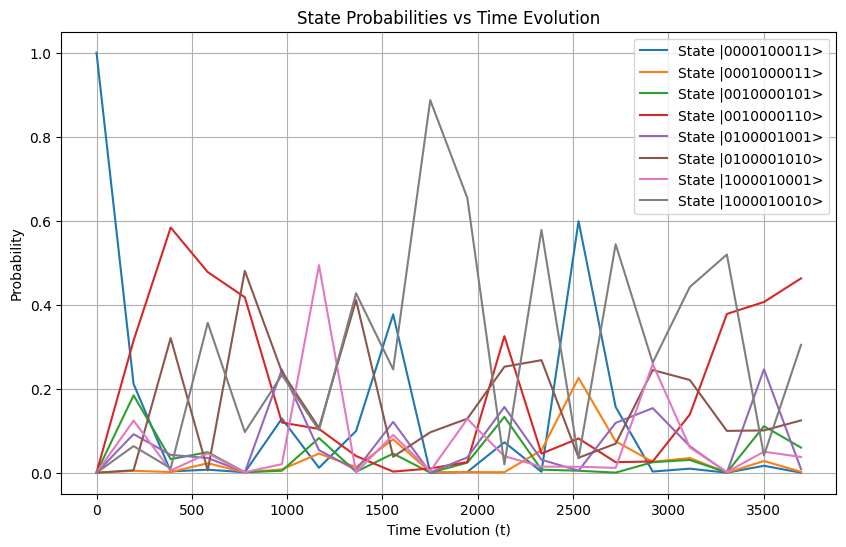

['0010000110', '1000010001', '0000100011', '0100001001', '0100001010', '1000010010']


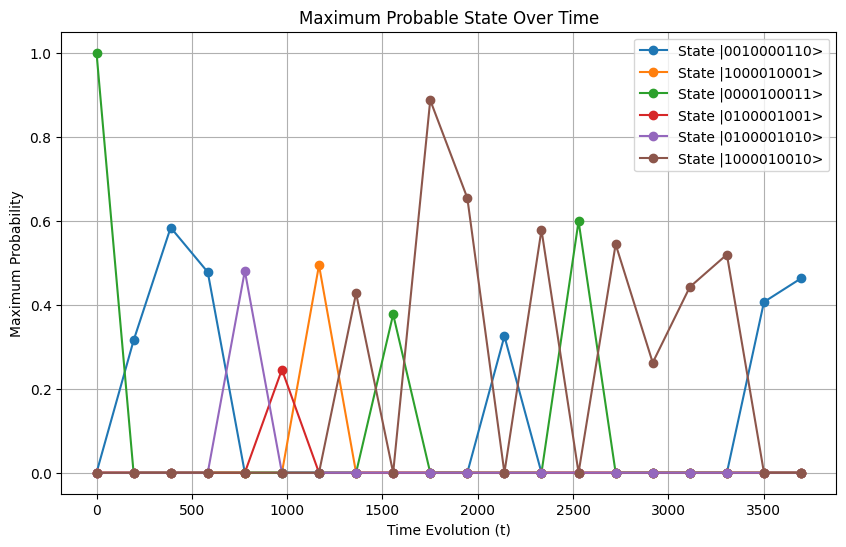

In [26]:

mapper = JordanWignerMapper()
hf_state = HartreeFock(
    electronic_structure_problem.num_spatial_orbitals,
    electronic_structure_problem.num_particles,
    mapper
)

# Step 3: Backend setup
backend = Aer.get_backend("qasm_simulator")

# Step 4: Loop over different time evolutions
state_probabilities = {}
max_probable_states = []  # To store maximum probable states at each time

for t in evolution_times:
    # Prepare circuit
    qc = QuantumCircuit(hf_state.num_qubits)
    qc.compose(hf_state, inplace=True)  # HF reference state
    evolution_op = PauliEvolutionGate(qubit_hamiltonian, time=t)
    qc.append(evolution_op, range(hf_state.num_qubits))  # Time evolution
    qc.measure_all()

    # Transpile and simulate
    tqc = transpile(qc, backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()

    # Normalize counts to probabilities
    total_shots = sum(counts.values())
    probabilities = {state: count / total_shots for state, count in counts.items()}

    # Find the state with maximum probability
    max_state = max(probabilities, key=probabilities.get)
    max_probable_states.append((t, max_state, probabilities[max_state]))

    # Store probabilities for this time
    state_probabilities[t] = probabilities

# Step 5: Plotting all state probabilities over time
all_states = set()
for probs in state_probabilities.values():
    all_states.update(probs.keys())
all_states = sorted(all_states)

fig, ax = plt.subplots(figsize=(10, 6))
for state in all_states:
    probs_over_time = [state_probabilities[t].get(state, 0.0) for t in evolution_times]
    ax.plot(evolution_times, probs_over_time, label=f"State |{state}>")

ax.set_title("State Probabilities vs Time Evolution")
ax.set_xlabel("Time Evolution (t)")
ax.set_ylabel("Probability")
ax.legend()
plt.grid()
plt.show()

# Step 6: Plot the maximum probable state over time
times, states, max_probs = zip(*max_probable_states)
unique_states = list(set(states))  # List of all unique max probable states
print(unique_states)
fig, ax = plt.subplots(figsize=(10, 6))
for state in unique_states:
    state_probs = [
        max_probs[i] if states[i] == state else 0.0 for i in range(len(times))
    ]
    ax.plot(times, state_probs, marker='o', label=f"State |{state}>")

ax.set_title("Maximum Probable State Over Time")
ax.set_xlabel("Time Evolution (t)")
ax.set_ylabel("Maximum Probability")
ax.legend()
plt.grid()
plt.show()


In [27]:
print(unique_states)

['0010000110', '1000010001', '0000100011', '0100001001', '0100001010', '1000010010']


In [28]:
sample_states = ['1000010010', '0010000110', '0000100011', '0100001010']
k = len(sample_states)
E_sub = np.zeros((k, k), dtype=complex)
S_sub = np.zeros((k, k), dtype=complex)
for i, state1 in enumerate(sample_states):
    for j, state2 in enumerate(sample_states):
        state2e = Statevector.from_label(state2).evolve(qubit_hamiltonian)
        # print(Statevector.from_label(state1).inner(state2e))
        E_sub[i, j] = Statevector.from_label(state1).inner(state2e)
        S_sub[i, j] = Statevector.from_label(state1).inner(Statevector.from_label(state2))
        # print(Statevector.from_label(state1).inner(Statevector.from_label(state2)))

In [29]:
E_sub

array([[-1.8816127 +0.j,  0.01686914+0.j, -0.00983237+0.j,
         0.01686914+0.j],
       [ 0.01686914+0.j, -1.8816127 +0.j, -0.00983237+0.j,
         0.01686914+0.j],
       [-0.00983237+0.j, -0.00983237+0.j, -7.31552598+0.j,
        -0.00983237+0.j],
       [ 0.01686914+0.j,  0.01686914+0.j, -0.00983237+0.j,
        -1.8816127 +0.j]])

In [30]:
S_sub

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [31]:
eigenvalues, eigenvectors = eigh(E_sub, S_sub)
print(eigenvalues)
print(eigenvectors)

[-7.31557902 -1.89848184 -1.89848184 -1.84782137]
[[ 0.00179825+0.j  0.42450922+0.j  0.69746583+0.j -0.57734747+0.j]
 [ 0.00179825+0.j -0.81627774+0.j  0.01890286+0.j -0.57734747+0.j]
 [ 0.99999515+0.j  0.        +0.j  0.        +0.j  0.00311467+0.j]
 [ 0.00179825+0.j  0.39176852+0.j -0.71636869+0.j -0.57734747+0.j]]


In [34]:
# Create UCCSD ansatz
from qiskit_nature.second_q.circuit.library import UCCSD
uccsd_ansatz = UCCSD(
    num_particles=electronic_structure_problem.num_particles,
    num_spatial_orbitals=electronic_structure_problem.num_spatial_orbitals,
    qubit_mapper=JordanWignerMapper()
)

# Initialize parameters with random values
initial_params = np.random.uniform(-np.pi, np.pi, uccsd_ansatz.num_parameters)
uccsd_ansatz.assign_parameters(initial_params)
print(initial_params)
print(uccsd_ansatz.draw())

[-2.29764359 -3.12143877  1.55146428  2.67512672 -0.61350782  1.71184393
 -3.10506213  2.05447125  1.21375724  1.18612541 -1.53815307 -0.05691526
  1.81081905  1.89241433 -0.4923116  -0.91485651  1.53904481 -1.00261912
  0.10611424 -3.0208527   0.88563481 -2.99494779 -1.62274384 -0.12975351
 -0.39178256  1.73756645 -0.384386    2.10364606 -1.61518084  1.36451098
 -0.9000379   3.13321899  2.63194924  0.70832059 -1.19276604  1.7032694
  2.06954671]
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
q_8: »
     »
q_9: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                               

In [41]:

mapper = JordanWignerMapper()
hf_state = HartreeFock(
    electronic_structure_problem.num_spatial_orbitals,
    electronic_structure_problem.num_particles,
    mapper
)

# Step 3: Backend setup
backend = Aer.get_backend("qasm_simulator")

# Step 4: Loop over different time evolutions
state_probabilities = {}
max_probable_states = []  # To store maximum probable states at each time

for t in evolution_times:
    # Prepare circuit
    qc = QuantumCircuit(hf_state.num_qubits)
    uccsd = uccsd_ansatz.bind_parameters(initial_params)
    qc.compose(uccsd, inplace=True)  # HF reference state
    evolution_op = PauliEvolutionGate(qubit_hamiltonian, time=t)
    qc.append(evolution_op, range(hf_state.num_qubits))  # Time evolution
    qc.measure_all()

    # Transpile and simulate
    tqc = transpile(qc, backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()

    # Normalize counts to probabilities
    total_shots = sum(counts.values())
    probabilities = {state: count / total_shots for state, count in counts.items()}

    # Find the state with maximum probability
    max_state = max(probabilities, key=probabilities.get)
    max_probable_states.append((t, max_state, probabilities[max_state]))

    # Store probabilities for this time
    state_probabilities[t] = probabilities

# Step 5: Plotting all state probabilities over time
all_states = set()
for probs in state_probabilities.values():
    all_states.update(probs.keys())
all_states = sorted(all_states)

fig, ax = plt.subplots(figsize=(10, 6))
for state in all_states:
    probs_over_time = [state_probabilities[t].get(state, 0.0) for t in evolution_times]
    ax.plot(evolution_times, probs_over_time, label=f"State |{state}>")

ax.set_title("State Probabilities vs Time Evolution")
ax.set_xlabel("Time Evolution (t)")
ax.set_ylabel("Probability")
ax.legend()
plt.grid()
plt.show()

# Step 6: Plot the maximum probable state over time
times, states, max_probs = zip(*max_probable_states)
unique_states = list(set(states))  # List of all unique max probable states
print(unique_states)
fig, ax = plt.subplots(figsize=(10, 6))
for state in unique_states:
    state_probs = [
        max_probs[i] if states[i] == state else 0.0 for i in range(len(times))
    ]
    ax.plot(times, state_probs, marker='o', label=f"State |{state}>")

ax.set_title("Maximum Probable State Over Time")
ax.set_xlabel("Time Evolution (t)")
ax.set_ylabel("Maximum Probability")
ax.legend()
plt.grid()
plt.show()


AttributeError: 'UCCSD' object has no attribute 'bind_parameters'

In [42]:
# Generate the UCCSD quantum circuit
uccsd_circuit = uccsd_ansatz.construct_circuit()

# Bind the parameters to the generated circuit
bound_uccsd_circuit = uccsd_circuit.bind_parameters(initial_params)

# Now you can use `bound_uccsd_circuit` in your workflow
qc = QuantumCircuit(bound_uccsd_circuit.num_qubits)
qc.compose(bound_uccsd_circuit, inplace=True)

# Example: Add Pauli evolution (assuming `qubit_hamiltonian` and `t` are defined)
evolution_op = PauliEvolutionGate(qubit_hamiltonian, time=t)
qc.append(evolution_op, range(bound_uccsd_circuit.num_qubits))

print("Final Quantum Circuit:")
print(qc)

AttributeError: 'UCCSD' object has no attribute 'construct_circuit'